In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error
import os


In [40]:
df =  pd.read_csv('movies.csv')

df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
df = pd.read_csv("ratings.csv")

In [44]:
ratings_data=pd.read_csv("ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:

df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df.tail()

,movieId,title,genres
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [6]:
df.shape

(10329, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [8]:
df.describe(include = 'all')

,movieId,title,genres
count,10329.000000,10329,10329
unique,NaN,10327,938
top,NaN,War of the Worlds (2005),Drama
freq,NaN,2,1385
mean,31924.282893,NaN,NaN
std,37734.741149,NaN,NaN
min,1.000000,NaN,NaN
25%,3240.000000,NaN,NaN
50%,7088.000000,NaN,NaN
75%,59900.000000,NaN,NaN


In [19]:
df.describe(include = 'object')

,title,genres
count,10329,10329
unique,10327,938
top,War of the Worlds (2005),Drama
freq,2,1385


In [20]:
df.describe(include = 'number')

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [21]:
# checking for missing values
df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [22]:
# Missing values in percentage format
missing_values = df.isnull().sum()
missing_vallues = df.isnull().sum().sort_values(ascending= False)
percent = ((df.isnull().sum()/df.shape[0]*100))
percent= percent.sort_values(ascending = False)
missing_data = pd.concat([missing_values,percent],axis = 1,
                        keys = ['Total Missing Values', 'Percentage of missing values'])
missing_data['Type of data'] = df[missing_data.index].dtypes
missing_data

,Total Missing Values,Percentage of missing values,Type of data
movieId,0,0.0,int64
title,0,0.0,object
genres,0,0.0,object


<AxesSubplot: ylabel='count'>

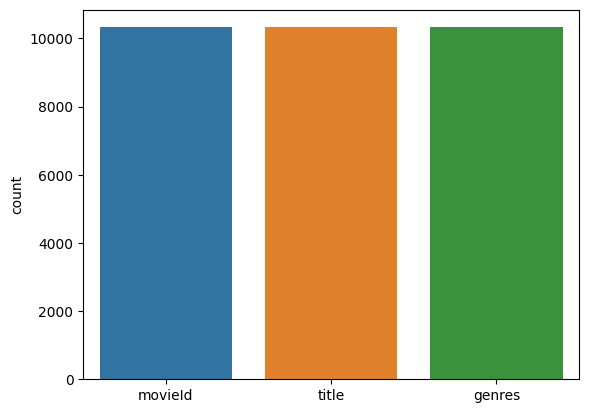

In [23]:
sns.countplot(df.isnull())

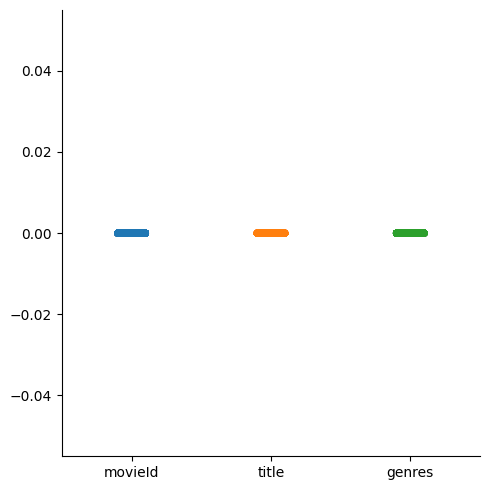

In [26]:
sns.catplot(df.isnull())

In [27]:
# check for duplicate entries
df.duplicated().sum()


0

In [28]:
# remove the duplicate entries 
df.drop_duplicates(inplace = True)

In [29]:
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [41]:
movie_data=pd.merge(ratings_data,df,on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [48]:
trend=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 
trend.head()

,rating,total number of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Til There Was You (1997),4.000000,2
"'burbs, The (1989)",3.176471,17


C:\Users\zoped\AppData\Local\Temp\ipykernel_6768\3403848412.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")


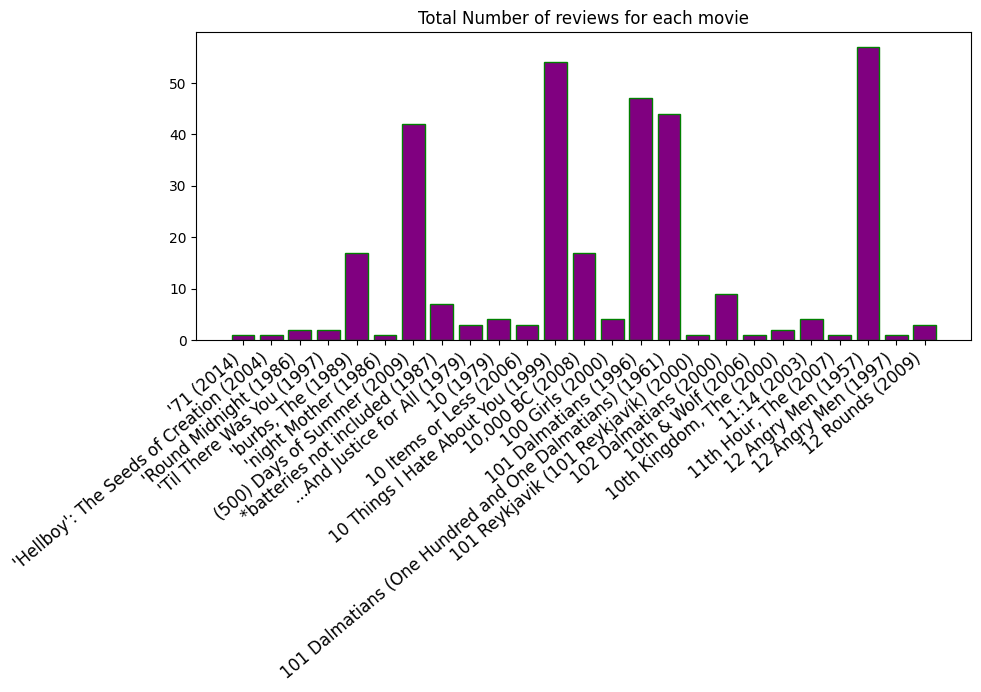

In [50]:
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='Purple',edgecolor='green')
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

In [51]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
True Stories (1986)                                     5.0
Chinese Puzzle (Casse-tête chinois) (2013)              5.0
The Jinx: The Life and Deaths of Robert Durst (2015)    5.0
Idiots and Angels (2008)                                5.0
Bossa Nova (2000)                                       5.0
Name: rating, dtype: float64